# **STAT 4329 Statistical Programming**
**Final project**

**Author:**  Robert Alvarez<br>

**Last modified:** May 6th  <br>

## 1.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import folium

Download the four datasets (stations.csv, status.csv, trips.csv, weather.csv) from the Kaggle website https://www.kaggle.com/datasets/benhamner/sf-bay-area-bike-share.

Read weather data, set dates as their index and only keep column of interest.

In [2]:
weather = pd.read_csv("weather.csv")

In [3]:
weather = weather.set_index(pd.to_datetime(weather['date']))[['mean_visibility_miles','events','zip_code']]
display(weather)

,mean_visibility_miles,events,zip_code
date,,,
2013-08-29,10.0,NaN,94107
2013-08-30,10.0,NaN,94107
2013-08-31,10.0,NaN,94107
2013-09-01,10.0,NaN,94107
2013-09-02,10.0,NaN,94107
...,...,...,...
2015-08-27,10.0,NaN,95113
2015-08-28,10.0,NaN,95113
2015-08-29,10.0,NaN,95113


a. From trips.csv data, which records each and individual trips, construct an aggregated data that includes daily rides for subscriber and daily rides for customers for each day and each station id. For other numerical variables such as duration, please compute their daily averages for each day and station id. Please name this data as "dailyrides". [hint: you can use group by commands]

In [4]:
trips = pd.read_csv("trip.csv")

In [5]:
#Take out the minutes in start_data and end_date
trips['start_date'] = pd.to_datetime(trips['start_date']).dt.date

In [6]:
#Group base on stating date, subscription type and starting station id. Then take the averade of the trips duration.
dailyrides = trips.groupby(['subscription_type','start_date','start_station_id',])['duration'].mean().to_frame()

In [7]:
dailyrides.index = dailyrides.index.rename("time", level=1)
dailyrides.index = dailyrides.index.rename("station_id", level=2)

In [8]:
display(dailyrides)

duration
subscription_type time       station_id             
Customer          2013-08-29 2           1051.500000
                             3            797.000000
                             9           1264.500000
                             11           931.000000
                             13           412.000000
...                                              ...
Subscriber        2015-08-31 77           446.347826
                             80           954.000000
                             82           579.583333
                             83           251.000000
                             84           539.250000

[66979 rows x 1 columns]

b. Convert the status.csv to daily data by creating new variables "avg_no_of_bikes_available" (daily averages of # bikes_available for each station_id) and "avg_no_of_docks_available" (daily average of # docks_available for each station_id). Please name this data as "dailystatus"

In [9]:
status = pd.read_csv("status.csv")

In [10]:
#Take out the minutes in time
status['time'] = pd.to_datetime(status['time']).dt.date

In [11]:
#Group by id and day, and calculate mean in both bikes and docks
dailystatus = status.groupby(["time","station_id"]).agg('mean') \
               .rename(columns={"bikes_available": "avg_no_of_bikes_available", "docks_available": "avg_no_of_docks_available"})

In [12]:
display(dailystatus)

avg_no_of_bikes_available  avg_no_of_docks_available
time       station_id                                                      
2013-08-29 2                            2.241433                  24.758567
           3                            7.975078                   7.024922
           4                            3.866044                   7.133956
           5                            9.029595                   9.970405
           6                            3.887850                  11.112150
...                                          ...                        ...
2015-08-31 77                          13.781250                  12.547222
           80                           7.495833                   6.830556
           82                           8.096528                   6.903472
           83                           4.587500                  10.412500
           84                           8.327083                   6.672917

[50388 rows x 2 columns]

c. Merge "dailyrides" with "dailystatus" and with the other datasets and create a consolidated single dataset.

In [13]:
dailydf = dailyrides.join(dailystatus)

In [14]:
display(dailydf)

duration  \
time       station_id subscription_type                
2013-08-29 2          Customer           1051.500000   
                      Subscriber          763.000000   
           3          Customer            797.000000   
                      Subscriber          483.400000   
           4          Subscriber          352.333333   
...                                              ...   
2015-08-31 77         Subscriber          446.347826   
           80         Subscriber          954.000000   
           82         Subscriber          579.583333   
           83         Subscriber          251.000000   
           84         Subscriber          539.250000   

                                         avg_no_of_bikes_available  \
time       station_id subscription_type                              
2013-08-29 2          Customer                            2.241433   
                      Subscriber                          2.241433   
           3          Customer                            7.975078   
                      Subscriber                          7.975078   
           4          Subscriber                          3.866044   
...                                                            ...   
2015-08-31 77         Subscriber                         13.781250   
           80         Subscriber                          7.495833   
           82         Subscriber                          8.096528   
           83         Subscriber                          4.587500   
           84         Subscriber                          8.327083   

                                         avg_no_of_docks_available  
time       station_id subscription_type                             
2013-08-29 2          Customer                           24.758567  
                      Subscriber                         24.758567  
           3          Customer                            7.024922  
                      Subscriber                          7.024922  
           4          Subscriber                          7.133956  
...                                                            ...  
2015-08-31 77         Subscriber                         12.547222  
           80         Subscriber                          6.830556  
           82         Subscriber                          6.903472  
           83         Subscriber                         10.412500  
           84         Subscriber                          6.672917  

[66979 rows x 3 columns]

d. Create new variables "weekday", "month". From the variable "installation_date", please create a variable "timesinceinstall" which is the time difference (in days) from the time of installation to current date.

In [15]:
station = pd.read_csv("station.csv")

In [16]:
#Make a weekday and month column by making a to_datetime dataframe and using day_name and month_name attribute, respectively.
my_days = pd.to_datetime(station['installation_date'])
station['weekday'] = my_days.dt.day_name()
station['month'] = my_days.dt.month_name()

In [17]:
#Calculate time since installation
station['timesinceinstall'] = (pd.to_datetime('now') - my_days).dt.days

/var/folders/f8/ppf673qn3p9f0kpqv1mq3g480000gn/T/ipykernel_5602/1842255141.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  station['timesinceinstall'] = (pd.to_datetime('now') - my_days).dt.days


In [18]:
display(station)

,id,name,lat,long,dock_count,city,installation_date,weekday,month,timesinceinstall
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/13,Tuesday,August,3562
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/13,Monday,August,3563
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/13,Tuesday,August,3562
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/13,Monday,August,3563
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/13,Wednesday,August,3561
...,...,...,...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/13,Sunday,August,3543
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/13,Tuesday,December,3415
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/14,Wednesday,January,3393
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/14,Thursday,February,3364


e. Using the longitude and latitude, please plot the location of the station on the map.

In [21]:
lat = station['lat'].values
lon = station['long'].values
map = folium.Map(location=[(min(lat)+max(lat))/2, (min(lon)+max(lon))/2])
for point in zip(lat, lon):
    folium.Marker(point, popup='Point').add_to(map)
display(map)

f. Please plot the total number of rides (in log(x+1) scale) for different visibility levels for both subscribers and customers. Interpret the plot.

In [22]:
#Make a dictionary where the keys are the cities and the values are the station IDs
city_to_IDs = {}
cities = np.unique(station.loc[:,'city'])
for city in cities:
    city_to_IDs[city] = np.unique(station[station.loc[:,'city']==city].loc[:,'id'])

#Make dataframe with days as index and subscription_type, zip_code, and station ID as columns
day_trips = trips.set_index(pd.to_datetime(trips['start_date']).dt.date)[['subscription_type','zip_code','start_station_id']]

#Make a dictionary that map the 5 possible cities for the zip code in the weather data
city_to_zip = {'Mountain View' : 94041, 'Palo Alto' : 94301, 'Redwood City' : 94063,
               'San Francisco' : 94107, 'San Jose' : 95113}

#Overwrite zip_codes so they match the weather zip_codes
for city in city_to_IDs.keys():
    city_idxs = day_trips.loc[:,'start_station_id'].isin(city_to_IDs[city])
    day_trips.loc[city_idxs,'zip_code'] = city_to_zip[city]

#Drop start_station_id
day_trips = day_trips.drop('start_station_id', axis=1)

display(day_trips)

,subscription_type,zip_code
start_date,,
2013-08-29,Subscriber,94107
2013-08-29,Subscriber,95113
2013-08-29,Subscriber,94041
2013-08-29,Subscriber,95113
2013-08-29,Subscriber,94107
...,...,...
2014-09-01,Subscriber,94107
2014-09-01,Customer,94107
2014-09-01,Customer,94107


In [23]:
display(weather)

,mean_visibility_miles,events,zip_code
date,,,
2013-08-29,10.0,NaN,94107
2013-08-30,10.0,NaN,94107
2013-08-31,10.0,NaN,94107
2013-09-01,10.0,NaN,94107
2013-09-02,10.0,NaN,94107
...,...,...,...
2015-08-27,10.0,NaN,95113
2015-08-28,10.0,NaN,95113
2015-08-29,10.0,NaN,95113


Text(0, 0.5, 'log10(# of rides + 1)')

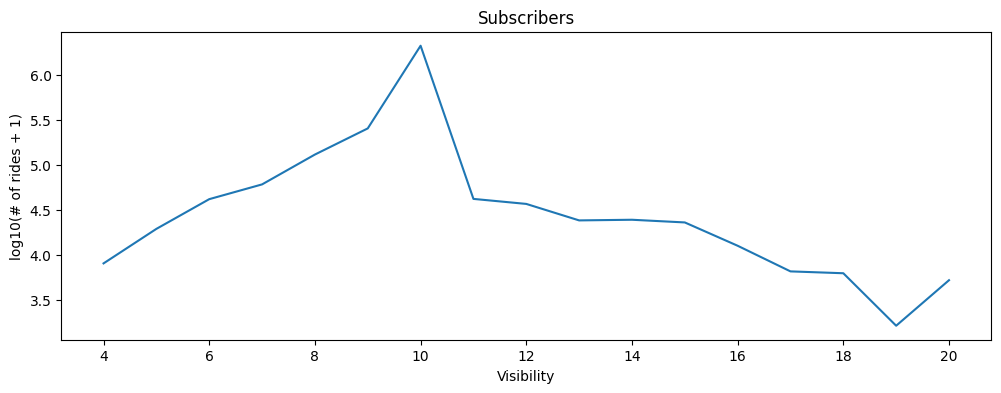

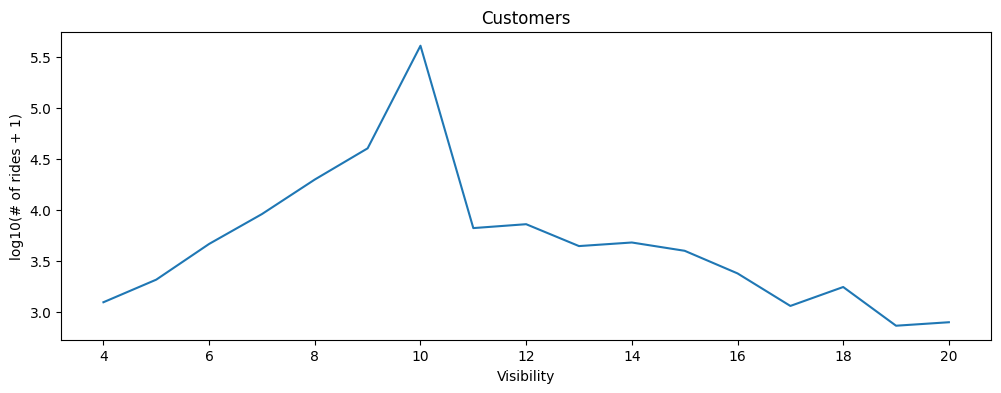

In [24]:
#Fill in missing data in mean_visibility_miles with the value above it
weather['mean_visibility_miles'] = weather['mean_visibility_miles'].fillna(method='ffill')

#Get unique visivilities and zip codes from weather data
visibilities = list(set(weather['mean_visibility_miles']))
zip_codes = set(weather['zip_code'])

#From day_trips separate the df for subscriber and customer.
sub_day_trips = day_trips[day_trips['subscription_type'] == 'Subscriber'].drop('subscription_type', axis=1)
cust_day_trips = day_trips[day_trips['subscription_type'] == 'Customer'].drop('subscription_type', axis=1)

#Make lists for total number of rides for each visibility
ls_tot_sub = []
ls_tot_cus = []

#For each visibility, get the number of rides that happened 
for visibility in visibilities:
    #Get days with the same visibility
    days = weather[weather['mean_visibility_miles'] == visibility]
    #Get the trips that match the zip_code area and dates
    tot_sub = 0
    tot_cus = 0
    for zip_code in zip_codes:
        #Get all indeces that have this zip_code number
        same_zip_code = days[days.loc[:,'zip_code'] == zip_code]
        #Sum to tot the number of trips that 
        tot_sub += sub_day_trips.loc[same_zip_code.index.date].shape[0]
        #Same for customers
        tot_cus += cust_day_trips.loc[same_zip_code.index.date].shape[0]
    ls_tot_sub.append(np.log10(tot_sub+1))
    ls_tot_cus.append(np.log10(tot_cus+1))

#Make two plots, one for subscriber and one for customers
_, axs = plt.subplots(figsize=(12, 4))
axs.plot(visibilities, ls_tot_sub)
axs.set_title('Subscribers')
plt.xlabel("Visibility")
plt.ylabel("log10(# of rides + 1)")

_, axs = plt.subplots(figsize=(12, 4))
axs.plot(visibilities, ls_tot_cus)
axs.set_title('Customers')
plt.xlabel("Visibility")
plt.ylabel("log10(# of rides + 1)")

In [ ]:
#We can see that when visibility is 10 +- 1 the amount of rides is the highest. This doesn't mean that when
# visibility is from 9 to 11 people are more likely to ride. This just show that the five cities tent to have a
# visibility of around 10. If we would like to know how likely people are to ride for each visibility we would need
# to divide the visibility by the number of days that had this visibility.
#But, as for comparison of the two groups, it seems to be have identical pattern. And, there are more subscribers
# than customers for each visibility.

g. Please plot the total number of rides (in log(x+1) scale) for different weather events for both subscribers and customers. Interpret the plot.

Text(0, 0.5, 'log10(# of rides + 1)')

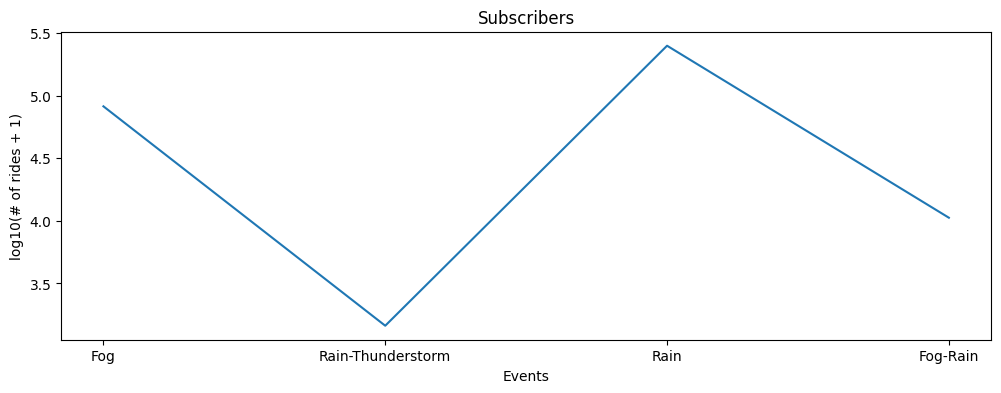

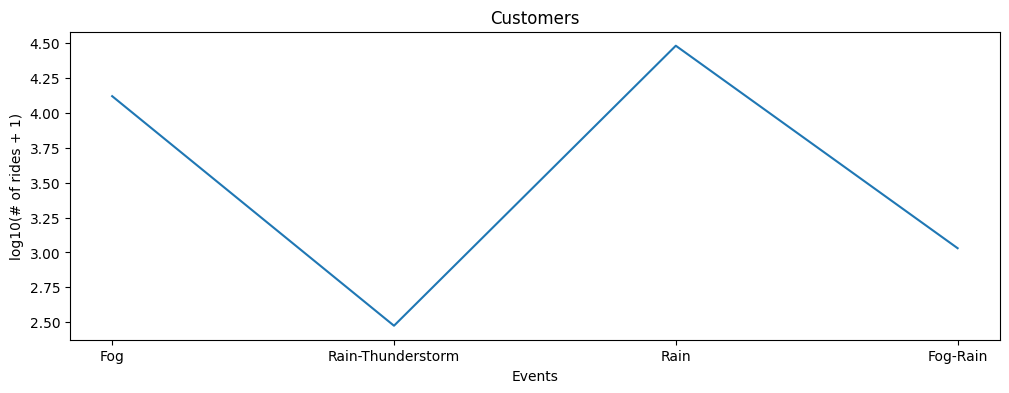

In [33]:
#Drop N/A values in events columns
events = weather[weather['events'].notna()]
#Rename rain events to Rain
events.loc[events['events'] == 'rain'] = 'Rain'

#Get unique visivilities and zip codes from weather data
uniq_events = list(set(events['events']))
zip_codes = set(weather['zip_code'])

#From day_trips separate the df for subscriber and customer.
sub_day_trips = day_trips[day_trips['subscription_type'] == 'Subscriber'].drop('subscription_type', axis=1)
cust_day_trips = day_trips[day_trips['subscription_type'] == 'Customer'].drop('subscription_type', axis=1)

#Make lists for total number of rides for each visibility
ls_tot_sub = []
ls_tot_cus = []

#For each visibility, get the number of rides that happened 
for event in uniq_events:
    #Get days with the same visibility
    days = events[events['events'] == event]
    #Get the trips that match the zip_code area and dates
    tot_sub = 0
    tot_cus = 0
    for zip_code in zip_codes:
        #Get all indeces that have this zip_code number
        same_zip_code = days[days.loc[:,'zip_code'] == zip_code]
        #Sum to tot the number of trips that 
        tot_sub += sub_day_trips.loc[same_zip_code.index.date].shape[0]
        #Same for customers
        tot_cus += cust_day_trips.loc[same_zip_code.index.date].shape[0]
    ls_tot_sub.append(np.log10(tot_sub+1))
    ls_tot_cus.append(np.log10(tot_cus+1))

#Make two plots, one for subscriber and one for customers
_, axs = plt.subplots(figsize=(12, 4))
axs.plot(uniq_events, ls_tot_sub)
axs.set_title('Subscribers')
plt.xlabel("Events")
plt.ylabel("log10(# of rides + 1)")

_, axs = plt.subplots(figsize=(12, 4))
axs.plot(uniq_events, ls_tot_cus)
axs.set_title('Customers')
plt.xlabel("Events")
plt.ylabel("log10(# of rides + 1)")

In [ ]:
#Same as the previous graph, we can see a identical trend. For example, riding more when is raining and less rides if
# there is rain-thunderstorm probability because people would usually don't go out on those weather conditions.

h. Plot the daily rides (as a time series plot) for both subscribers and customers. Interpret the plot.

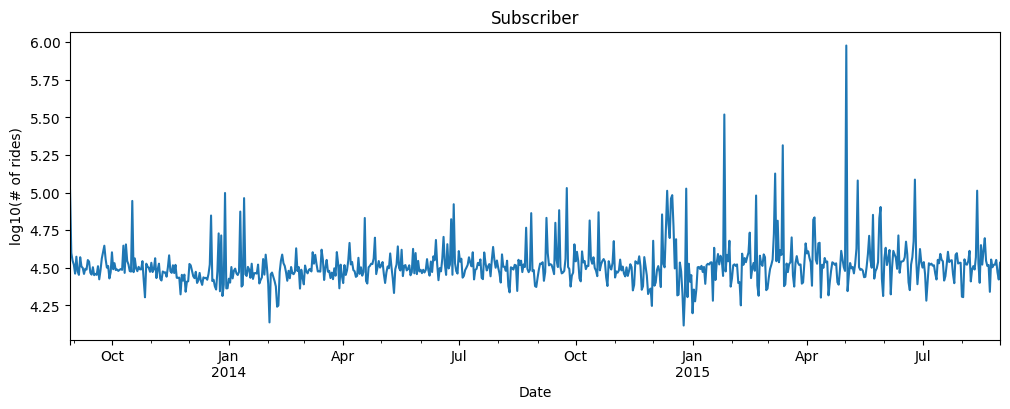

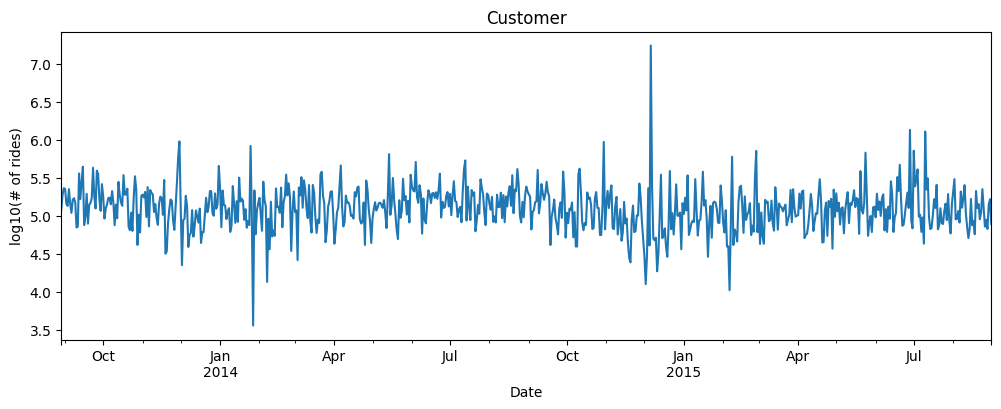

In [34]:
for sub_type in ["Subscriber", "Customer"]:
    _, axs = plt.subplots(figsize=(12, 4))
    subs = dailyrides.loc[sub_type]
    day_rides = subs.groupby('time').sum()
    day_rides['log10(duration)'] = np.log10(day_rides)
    day_rides = day_rides.set_index(pd.to_datetime(day_rides.index))
    day_rides['log10(duration)'].plot(ax=axs)
    plt.xlabel("Date")
    plt.ylabel("log10(# of rides)")
    plt.title(sub_type)

In [ ]:
#The time series plot do not look like it have a trend. There are in average more customers than subscribers using
# the ride service which may seems weird because on the previous two plots there where more subscribers than
# customers. A reason may be because the events tend to be recorded so by droping all NA values there may be a lot of
# casual custome that use the service in non-bad weather conditions. For the visibility plot maybe filling the values
# instead of droping them could be the responsible of having more subscribers than cusstomers.